<a href="https://colab.research.google.com/github/idenw/Deep-Learning/blob/master/keras_syntax_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/fake_reg.csv')

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.shape

(1000, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["feature1", "feature2"]].values

In [ ]:
y=df["price"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
#scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=15)

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu"))           #input_dim = 2  or input_dim = X_train.shape[0]
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="mse")

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=32, epochs=750, callbacks=[early_stop])

Epoch 1/750
22/22 [==============================] - 1s 8ms/step - loss: 254708.0217 - val_loss: 258800.9844
Epoch 2/750
22/22 [==============================] - 0s 9ms/step - loss: 260535.2548 - val_loss: 258578.9062
Epoch 3/750
22/22 [==============================] - 0s 3ms/step - loss: 255004.9497 - val_loss: 258286.0312
Epoch 4/750
22/22 [==============================] - 0s 3ms/step - loss: 254254.7765 - val_loss: 257870.1406
Epoch 5/750
22/22 [==============================] - 0s 3ms/step - loss: 257581.4552 - val_loss: 257285.2344
Epoch 6/750
22/22 [==============================] - 0s 3ms/step - loss: 259802.6216 - val_loss: 256515.7812
Epoch 7/750
22/22 [==============================] - 0s 3ms/step - loss: 249220.4959 - val_loss: 255538.9531
Epoch 8/750
22/22 [==============================] - 0s 3ms/step - loss: 254199.3743 - val_loss: 254297.1250
Epoch 9/750
22/22 [==============================] - 0s 3ms/step - loss: 254893.7982 - val_loss: 252747.4688
Epoch 10/750
22/22 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df=pd.DataFrame(model.history.history)

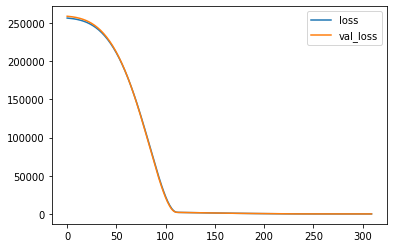

In [ ]:
loss_df.plot()

(0.0, 100.0)

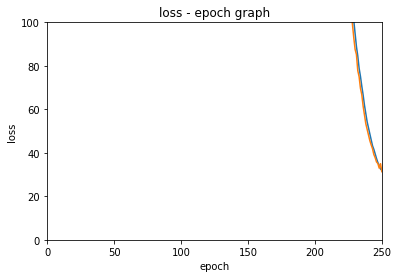

In [ ]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,250]) # focusing on the given x values
ax.set_ylim([0,100]) # focusing on the given y values

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971453495888065 
 mae: 4.01684474163254 
 mse: 25.098176808896568 
 rmse: 5.009808061083435


In [ ]:
y_test.shape

(300,)

In [ ]:
y_pred.shape

(300, 1)

In [ ]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [ ]:
compare.sample(5)

,Actual,Pred
210,547.275792,551.300720
213,331.121688,324.839722
227,257.711997,258.179443
66,581.542527,583.439148
22,375.137547,382.682159


In [ ]:
model.evaluate(X_train, y_train, verbose=0)

23.73360824584961

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

25.098175048828125

In [ ]:
import seaborn as sns

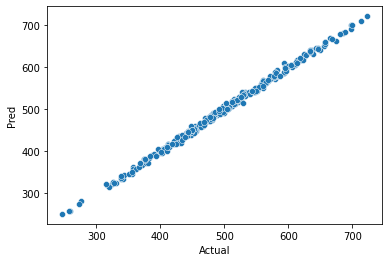

In [ ]:
sns.scatterplot(x="Actual", y="Pred", data=compare)

In [ ]:
# making predictions with the model

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
new_data =[[999, 1001]]

In [ ]:
new_data=scaler.transform(new_data)

In [ ]:
new_data

array([[0.30608328, 0.71932348]])

In [ ]:
model.predict(new_data)[0][0]

548.5577

In [ ]:
# saving and loading the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("my_model.h5")

In [ ]:
loaded_model=load_model("my_model.h5")

In [ ]:
new_data

array([[0.30608328, 0.71932348]])

In [ ]:
loaded_model.predict(new_data)

array([[548.5577]], dtype=float32)